In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "air-pollution-dataset-india20162018"

In [2]:
df2016 <- read.csv("../input/air-pollution-dataset-india20162018/2016_india.csv")
df2017 <- read.csv("../input/air-pollution-dataset-india20162018/2017_india.csv")
df2018 <- read.csv("../input/air-pollution-dataset-india20162018/2018_india.csv")


#Combining the Dataframes for the various years
df <- rbind(df2016, df2017)
df <- rbind(df, df2018)

In [3]:
#Summary statistics
summary(df)
cat("Total number of rows in the dataset = ",nrow(df))
head(df)

                                          location              city        
 Maharashtra Pollution Control Board - Solapur: 203732   Delhi    : 982903  
 Maharashtra Pollution Control Board Bandra   : 187847   Hyderabad: 418590  
 Ardhali Bazar                                : 159878   Bengaluru: 333116  
 Nehru Nagar                                  : 151012   Mumbai   : 266657  
 Chandrapur                                   : 143572   Lucknow  : 263059  
 Collectorate Jodhpur - RSPCB                 : 138175   Chennai  : 254636  
 (Other)                                      :5379068   (Other)  :3844323  
 country                            utc         
 IN:6363284   2018-03-20T19:30:00.000Z:    574  
              2018-03-21T06:30:00.000Z:    571  
              2018-03-20T20:30:00.000Z:    570  
              2018-03-21T19:30:00.000Z:    570  
              2018-03-22T06:30:00.000Z:    570  
              2018-03-20T21:30:00.000Z:    569  
              (Other)                 :63

Total number of rows in the dataset =  6363284

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
1,US Diplomatic Post: Hyderabad,Hyderabad,IN,2016-01-03T18:30:00.000Z,2016-01-04T00:00:00+05:30,pm25,61,µg/m³,17.44346,78.47489,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow.gov/index.cfm?action=airnow.global_summary""}]"
2,US Diplomatic Post: Chennai,Chennai,IN,2016-01-03T18:30:00.000Z,2016-01-04T00:00:00+05:30,pm25,28,µg/m³,13.05237,80.25193,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow.gov/index.cfm?action=airnow.global_summary""}]"
3,US Diplomatic Post: Mumbai,Mumbai,IN,2016-01-03T18:30:00.000Z,2016-01-04T00:00:00+05:30,pm25,127,µg/m³,19.06602,72.86870,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow.gov/index.cfm?action=airnow.global_summary""}]"
4,US Diplomatic Post: Kolkata,Kolkata,IN,2016-01-03T18:30:00.000Z,2016-01-04T00:00:00+05:30,pm25,337,µg/m³,22.54714,88.35105,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow.gov/index.cfm?action=airnow.global_summary""}]"
5,US Diplomatic Post: New Delhi,Delhi,IN,2016-01-03T18:30:00.000Z,2016-01-04T00:00:00+05:30,pm25,374,µg/m³,28.59810,77.18907,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow.gov/index.cfm?action=airnow.global_summary""}]"
6,US Diplomatic Post: Chennai,Chennai,IN,2016-01-03T19:30:00.000Z,2016-01-04T01:00:00+05:30,pm25,32,µg/m³,13.05237,80.25193,"[{""name"":""EPA AirNow DOS"",""url"":""http://airnow.gov/index.cfm?action=airnow.global_summary""}]"


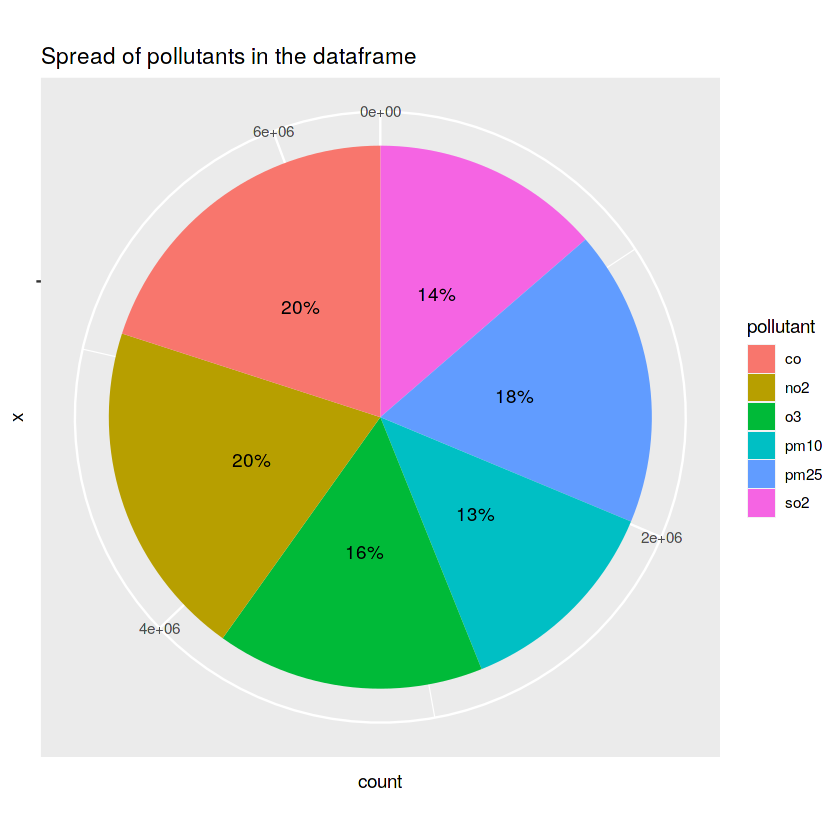

In [4]:
#Pie chart to check the different types of pollutants under consideration
library(ggplot2)
df_pie<- as.data.frame(table(df$parameter))
colnames(df_pie)=c("pollutant","count")
bp<- ggplot(df_pie, aes(x="", y=count, fill=pollutant))+
geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0)
pie<-pie+labs(title="Spread of pollutants in the dataframe")+geom_text(aes(label = paste0(round(count*100/nrow(df)), "%")), position = position_stack(vjust = 0.5))
pie

Number of negative rows =  19860
Show below is the number of NA entries in each column

location        city     country         utc       local   parameter 
          0           0           0           0           0           0 
      value        unit    latitude   longitude attribution 
          0           0     2169618     2169618           0

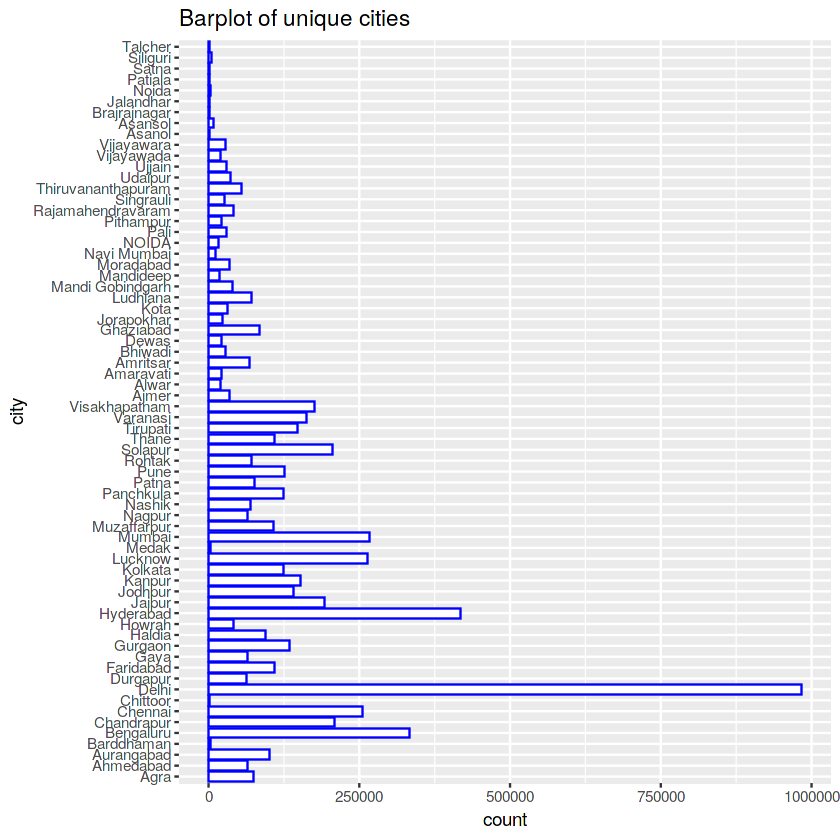

In [5]:
#Looking at how many cities are there and what is the spread

cities_table<-as.data.frame(table(df$city))
colnames(cities_table)=c("city","count")
p<-ggplot(cities_table, aes(x=city, y=count)) +
  geom_bar(stat="identity",color="blue", fill="white")+labs(title="Barplot of unique cities")
p + coord_flip()

#Negative values of Value atrributes
df_neg=df[df$value<0,]
cat("Number of negative rows = ",nrow(df_neg))

#Missing Values
cat("\nShow below is the number of NA entries in each column")
sapply(df, function(x) sum(is.na(x)))


We observe that there are a lot of rows in Delhi compared to the other cities.
Following Delhi we have Hyderabd and then Namma Bengaluru.
There seems to be a lot of missing values in Latitude longitude.
An effort can be made to check if the values can be filled using existing rows in the dataset if the cities match.

In [6]:
library(ggplot2)

#Converting to date type
df$utc=as.Date(df$utc)
#Plotting a boxplot for the various pollutant concetrations
so2<-df[df$parameter=="so2",]
no2<-df[df$parameter=="no2",]
co<-df[df$parameter=="co",]
pm10<-df[df$parameter=="pm10",]
pm25<-df[df$parameter=="pm25",]
o3<-df[df$parameter=="o3",]
bp_so2 <- ggplot(so2, aes(x=parameter,y=value)) + 
  geom_boxplot()+labs(title="Boxplot of SO2")
bp_no2 <- ggplot(no2, aes(x=parameter,y=value)) + 
  geom_boxplot()+labs(title="Boxplot of NO2")
bp_co <- ggplot(co, aes(x=parameter,y=value)) + 
  geom_boxplot()+labs(title="Boxplot of CO")
bp_pm10 <- ggplot(pm10, aes(x=parameter,y=value)) + 
  geom_boxplot()+labs(title="Boxplot of PM10")
bp_pm25 <- ggplot(pm25, aes(x=parameter,y=value)) + 
  geom_boxplot()+labs(title="Boxplot of PM2.5")
bp_o3 <- ggplot(o3, aes(x=parameter,y=value)) + 
  geom_boxplot()+labs(title="Boxplot of PM2.5")

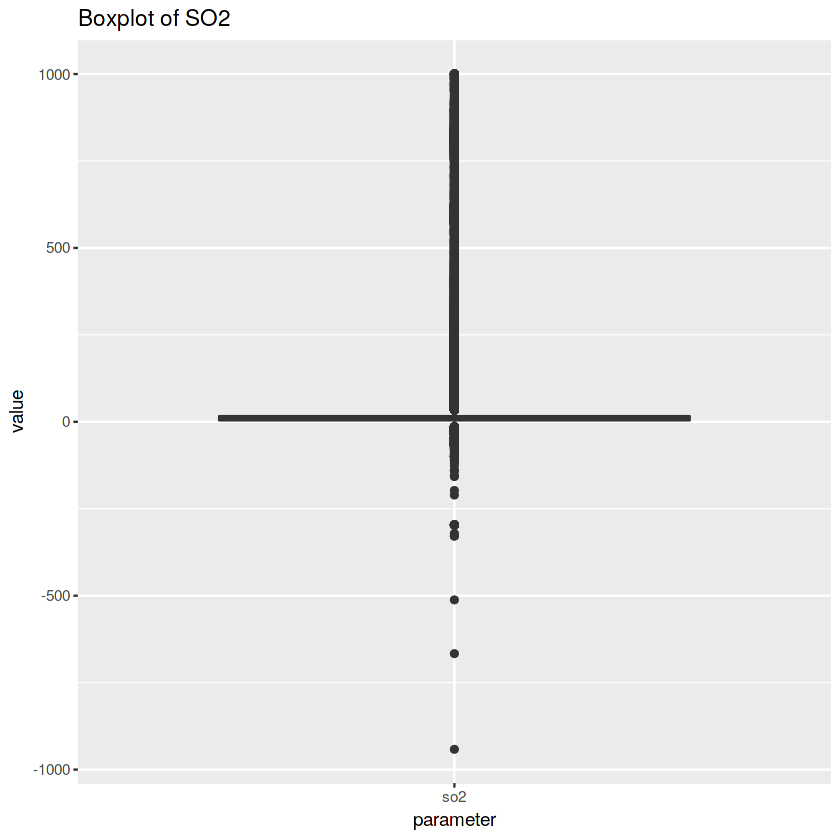

In [7]:
bp_so2

There are a large number of outliers.
We also observe negative values and negative values must just be noise in the dataset since negative concentration does not imply much.


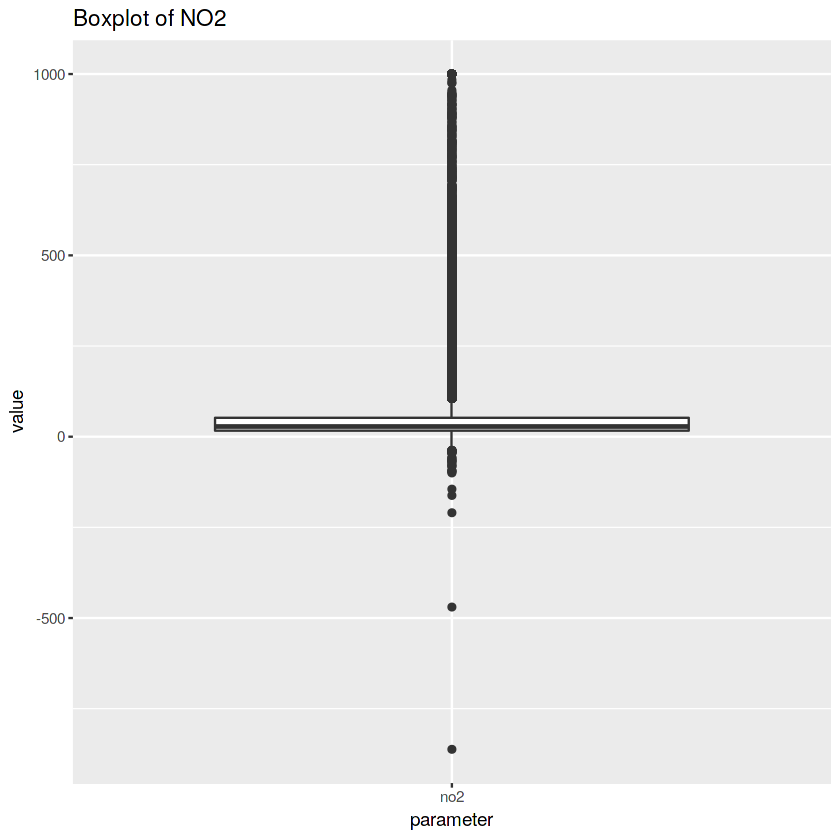

In [8]:
bp_no2

There appears to be negative values here as well

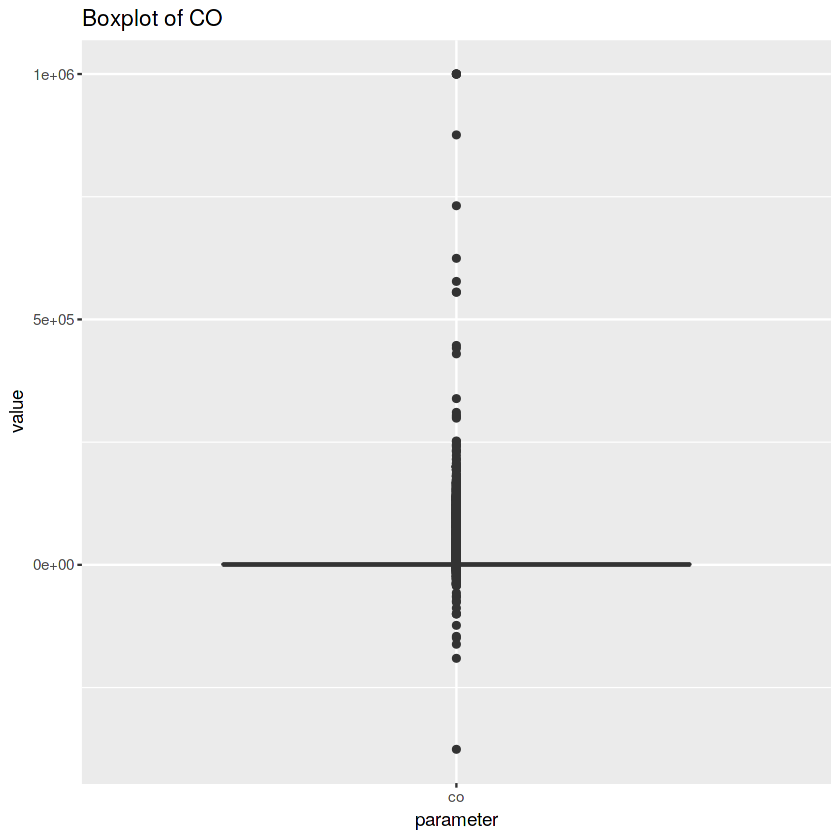

In [9]:
bp_co

Negative values with Carbon Monoxide as well

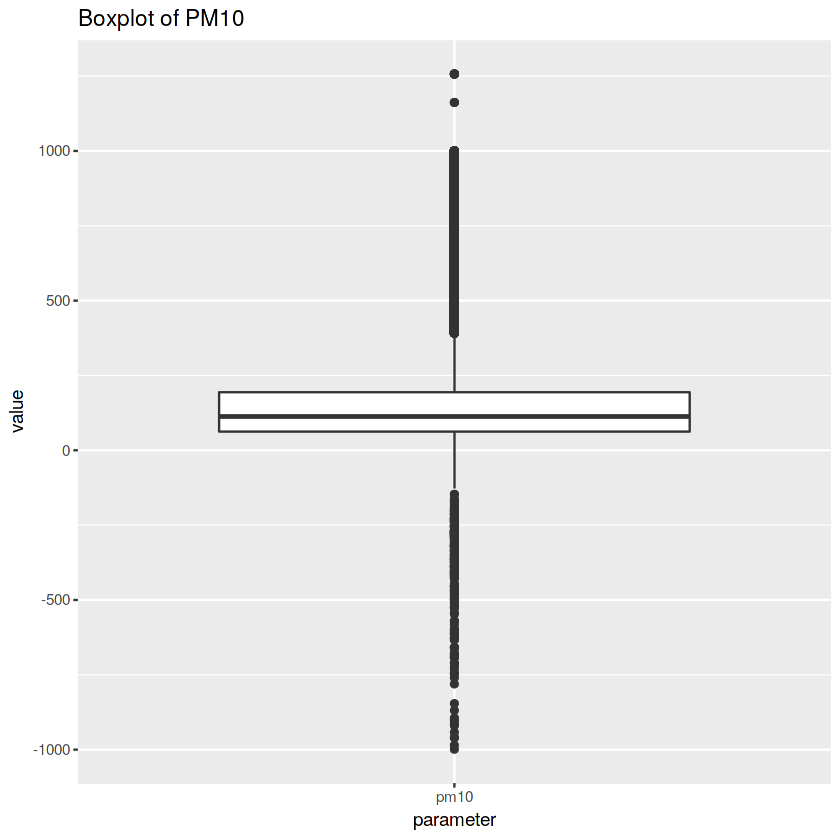

In [10]:
bp_pm10

Negative values in particulate matter of diameter <=10 micro meters as well

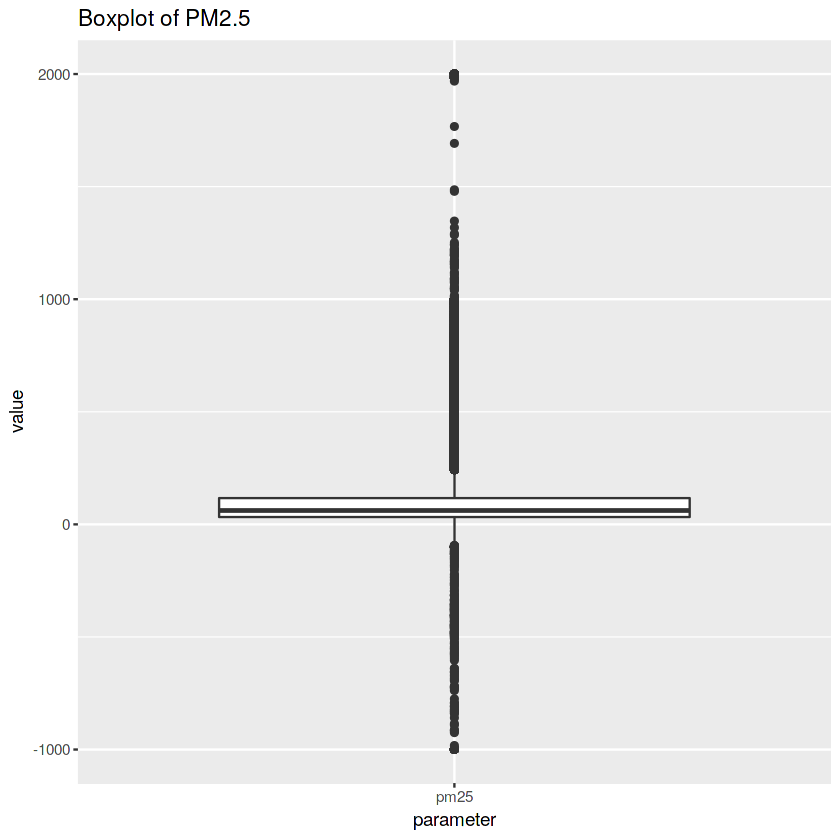

In [11]:
bp_pm25

Negative values for particulate matter of diameter <= 2.5 micro meter as well

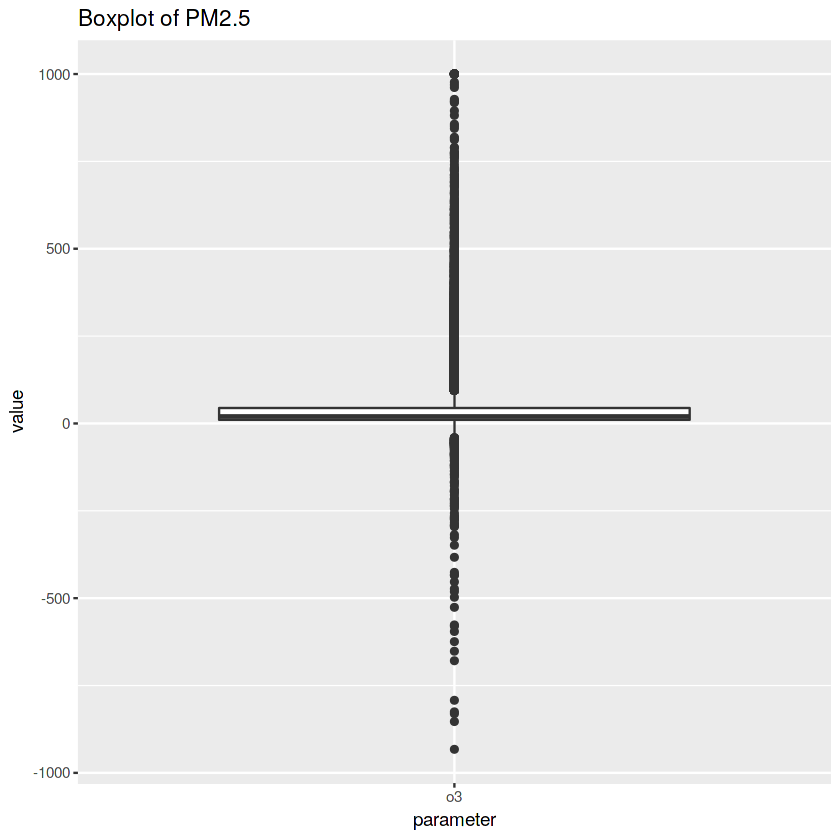

In [12]:
bp_o3

Ozone concentration also moves into the negative side.

In [13]:
#Finding how many negative values
negative_pollutant_conc<-sum(df$value<0)
print(paste("Number of rows with negative concentration = ",negative_pollutant_conc))

total_rows<-nrow(df)
percentage_negative = (negative_pollutant_conc/total_rows)*100
cat("Percentage of negative values = ",percentage_negative, "\n")

#0.3% of data is extremely small and thus these negative values can be removed since it is not possible to have negative concentrations
df<-df[df$value>0,]
cat("Total rows after removal of negative rows = ",nrow(df))

[1] "Number of rows with negative concentration =  19860"
Percentage of negative values =  0.312103 
Total rows after removal of negative rows =  6290163

We also observe that the column names "unit" takes a single values throughout the dataset.
It might look redundant, It is indeed redundant in the subset of the data we are working with.
The larger OpenAQ data has readings in ppm but data for India is completely in mug/m<sup>3</sup>
Hence we move forward and remove that column as well

In [14]:
df<-subset(df,select=-c(unit))
df2016<-subset(df2016, select=-c(unit))
df2017<-subset(df2017, select=-c(unit))
df2018<-subset(df2018, select=-c(unit))

In [15]:
#Observing the number of rows per city
rows_cities<-table(df$city)
rows_cities<-as.data.frame(rows_cities)
rows_cities<-rows_cities[order(-rows_cities$Freq),]
head(rows_cities)

,Var1,Freq
,<fct>,<int>
9,Delhi,972696
16,Hyderabad,412822
5,Bengaluru,332965
23,Mumbai,264695
21,Lucknow,261833
7,Chennai,251717


In [16]:
#Plotting Average concentration citywise

bengaluru<-df[df$city=="Bengaluru",]
chennai<-df[df$city=="Chennai",]
delhi<-df[df$city=="Delhi",]
mumbai<-df[df$city=="Mumbai",]
hyderabad<-df[df$city=="Hyderabad",]
agg_bengaluru<-aggregate(.~bengaluru$parameter,bengaluru,mean)
agg_chennai<-aggregate(.~chennai$parameter,chennai,mean)
agg_delhi<-aggregate(.~delhi$parameter,delhi,mean)
agg_mumbai<-aggregate(.~mumbai$parameter,mumbai,mean)
agg_hyderabad<-aggregate(.~hyderabad$parameter,hyderabad,mean)
agg_co<-c(agg_bengaluru$value[1],agg_chennai$value[1],agg_delhi$value[1],agg_mumbai$value[1],agg_hyderabad$value[1])
agg_no2<-c(agg_bengaluru$value[2],agg_chennai$value[2],agg_delhi$value[2],agg_mumbai$value[2],agg_hyderabad$value[2])
agg_o3<-c(agg_bengaluru$value[3],agg_chennai$value[3],agg_delhi$value[3],agg_mumbai$value[3],agg_hyderabad$value[3])
agg_pm10<-c(agg_bengaluru$value[4],agg_delhi$value[4],agg_mumbai$value[4],agg_hyderabad$value[4])
agg_pm25<-c(agg_bengaluru$value[5],agg_chennai$value[5],agg_delhi$value[5],agg_mumbai$value[5],agg_hyderabad$value[5])
agg_so2<-c(agg_bengaluru$value[6],agg_chennai$value[5],agg_delhi$value[6],agg_mumbai$value[6],agg_hyderabad$value[6])
cities_all<-c('Bengaluru','Chennai','Delhi','Mumbai','Hyderabad')
cities_pm10<-c('Bengaluru','Delhi','Mumbai','Hyderabad')
agg_co<-cbind.data.frame(agg_co,cities_all)
agg_no2<-cbind.data.frame(agg_no2,cities_all)
agg_o3<-cbind.data.frame(agg_o3,cities_all)
agg_pm10<-cbind.data.frame(agg_pm10,cities_pm10)
agg_pm25<-cbind.data.frame(agg_pm25,cities_all)
agg_so2<-cbind.data.frame(agg_so2,cities_all)

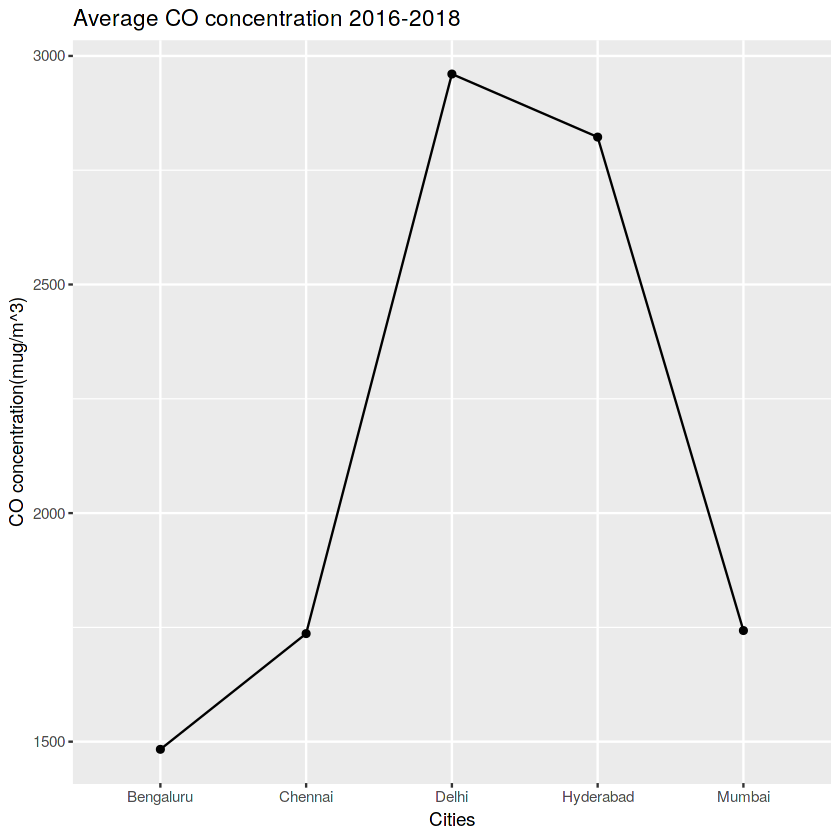

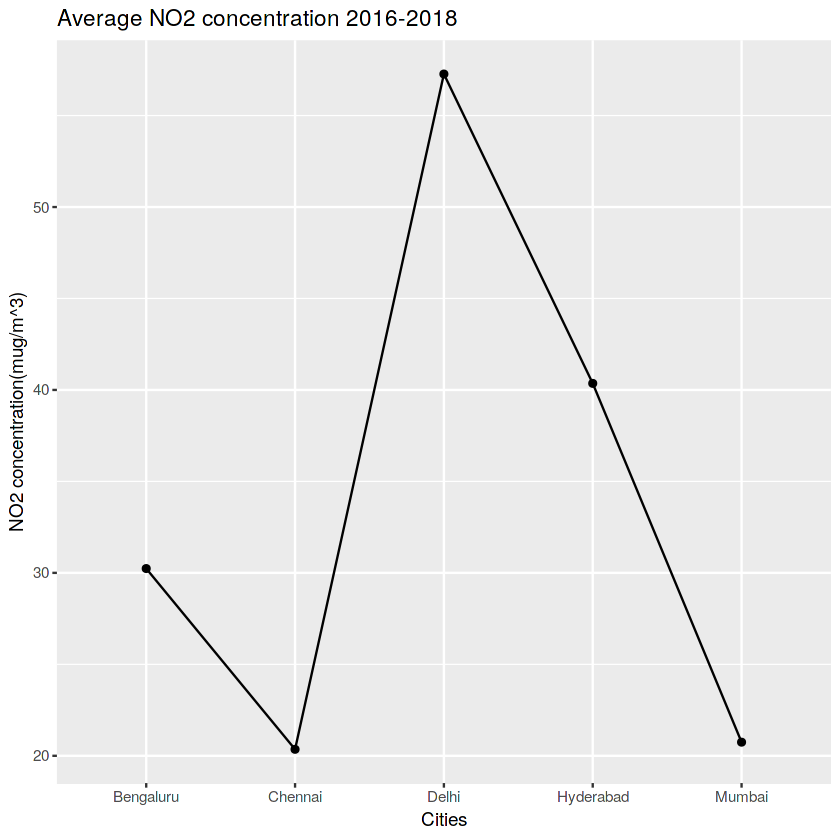

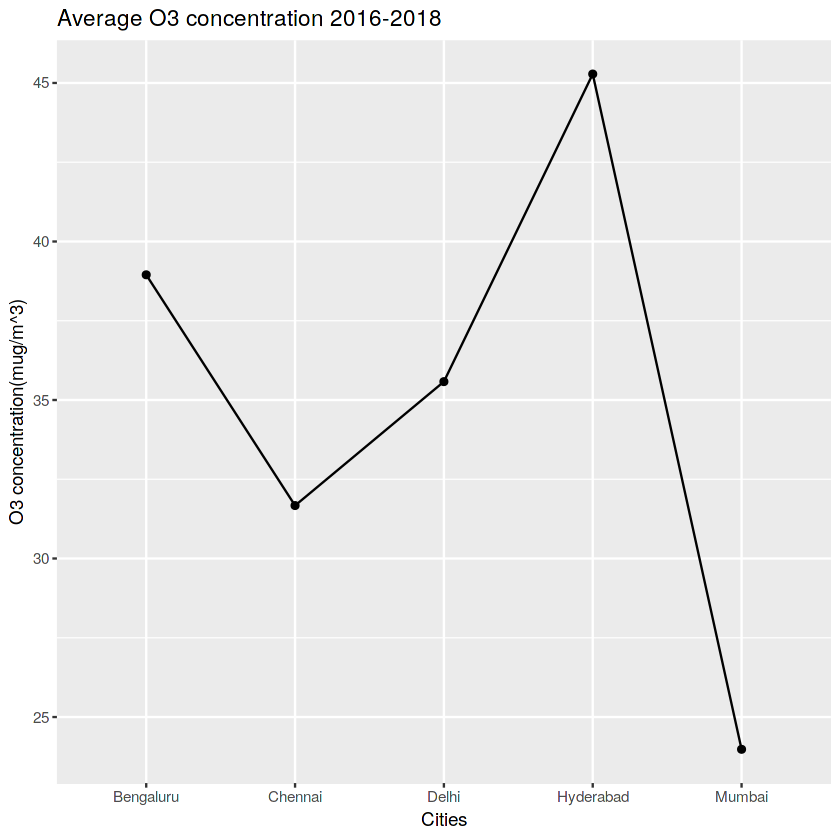

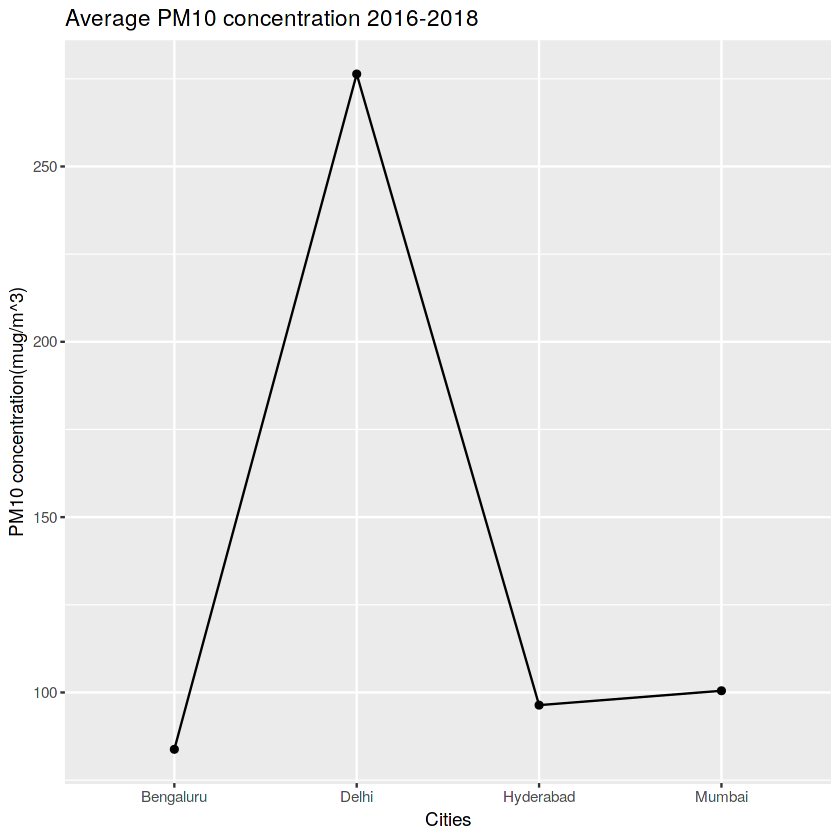

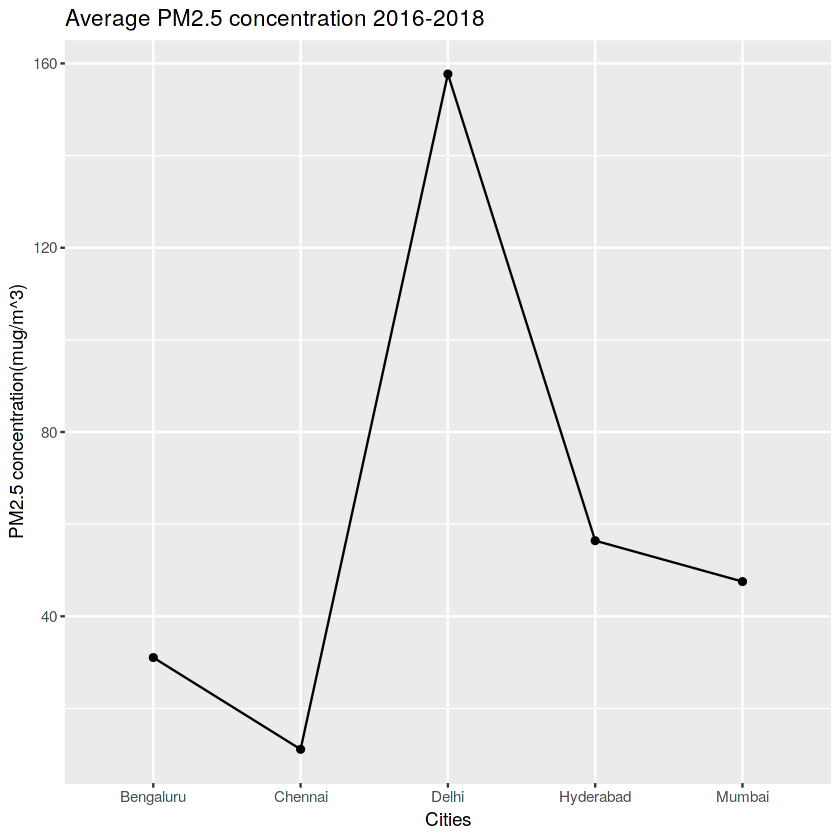

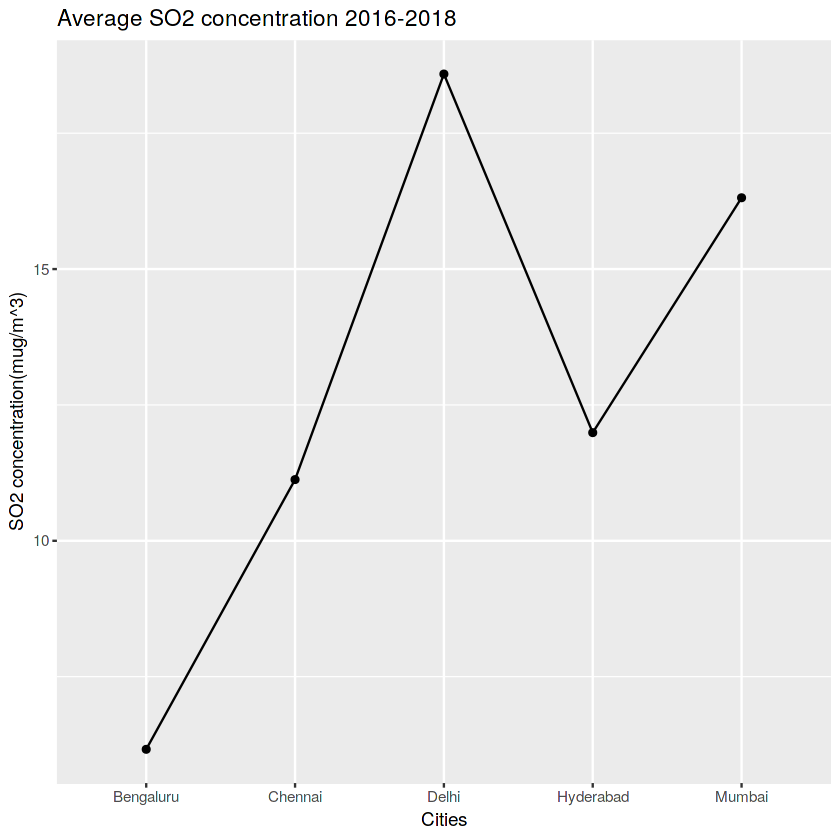

In [17]:
library(ggplot2)
# Basic line plot for average concentration over the span of 3 years for the top 5 cities with maximum number of rows.
#These being metropolitan cities can give us an idea about how the situation is in the major cities of India

ggplot(data=agg_co, aes(x=cities_all, y=agg_co,group=1)) +
  geom_line()+
  geom_point()+xlab('Cities')+ylab('CO concentration(mug/m^3)')+ggtitle("Average CO concentration 2016-2018")
ggplot(data=agg_no2, aes(x=cities_all, y=agg_no2,group=1)) +
  geom_line()+
  geom_point()+xlab('Cities')+ylab('NO2 concentration(mug/m^3)')+ggtitle("Average NO2 concentration 2016-2018")
ggplot(data=agg_o3, aes(x=cities_all, y=agg_o3,group=1)) +
  geom_line()+
  geom_point()+xlab('Cities')+ylab('O3 concentration(mug/m^3)')+ggtitle("Average O3 concentration 2016-2018")
ggplot(data=agg_pm10, aes(x=cities_pm10, y=agg_pm10,group=1)) +
  geom_line()+
  geom_point()+xlab('Cities')+ylab('PM10 concentration(mug/m^3)')+ggtitle("Average PM10 concentration 2016-2018")
ggplot(data=agg_pm25, aes(x=cities_all, y=agg_pm25,group=1)) +
  geom_line()+
  geom_point()+xlab('Cities')+ylab('PM2.5 concentration(mug/m^3)')+ggtitle("Average PM2.5 concentration 2016-2018")
ggplot(data=agg_so2, aes(x=cities_all, y=agg_so2,group=1)) +
  geom_line()+
  geom_point()+xlab('Cities')+ylab('SO2 concentration(mug/m^3)')+ggtitle("Average SO2 concentration 2016-2018")

Some general observations that can be made
* Delhi seems to have the highest concentration of almost all the pollutants
* Bengaluru comparitively seems to be doing better since it appears to have a lower concetration of pollutants

Number of unique agency JSON strings =  4 
The json string with agency 
	name =  [{"name":"EPA AirNow DOS","url":"http://airnow.gov/index.cfm?action=airnow.global_summary"}] , 
	count =  72171 
The json string with agency 
	name =   , 
	count =  49896 
The json string with agency 
	name =  [{"name":"Central Pollution Control Board","url":"http://www.cpcb.gov.in/CAAQM"}] , 
	count =  6003083 
The json string with agency 
	name =  [{"name":"Central Pollution Control Board","url":"https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing"},{"name":"data.gov.in","url":"https://data.gov.in/resources/real-time-air-quality-index-various-locations"}] , 
	count =  165013 


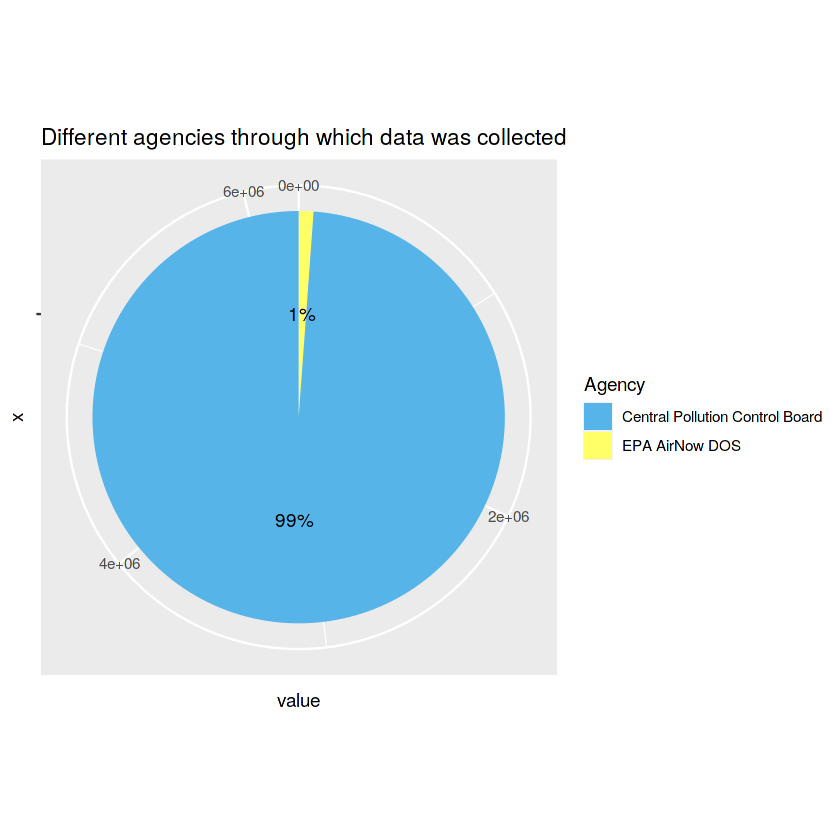

In [24]:
#Getting all the different agencies from which data was collected
#The name of the agencies is stored in the attribution column and are retrived using unique

#We notice that there are only 3 actual unique agencies (One of them is an empty string, no value was provided).
cat("Number of unique agency JSON strings = ", length(unique(df$attribution)), "\n")
val <- as.character(unique(df$attribution)[1])
cat("The json string with agency \n\tname = ", val, ", \n\tcount = ", sum(df[, 10] == val), "\n")

val2 <- as.character(unique(df$attribution)[2])
cat("The json string with agency \n\tname = ", val2, ", \n\tcount = ", sum(df[, 10] == val2), "\n")

val3 <- as.character(unique(df$attribution)[3])
cat("The json string with agency \n\tname = ", val3, ", \n\tcount = ", sum(df[, 10] == val3), "\n")

val4 <- as.character(unique(df$attribution)[4])
cat("The json string with agency \n\tname = ", val4, ", \n\tcount = ", sum(df[, 10] == val4), "\n")

#Some of the rows have two agecies that provide data one of them being "Central Pollution Control Board"
#So that is also included in the "Central Pollution Control Board"
#A pie chart to visualize the counts of each type
nums <- c(sum(df[, 10] == val), sum(df[, 10] == val3)+sum(df[, 10] == val4))
lab <- c("EPA AirNow DOS", "Central Pollution Control Board")

mypie <- data.frame(Agency = lab, value = nums)
library(ggplot2)

p<- ggplot(mypie, aes(x="", y=value, fill=Agency))+geom_bar(width = 1, stat = "identity")
pie <- p + coord_polar("y", start=0) + scale_fill_manual(values=c( "#56B4E9", "#FFFF66"))
pie <- pie + labs(title = "Different agencies through which data was collected") + 
        geom_text(aes(label = paste0(round(value*100/sum(nums)), "%")), position = position_stack(vjust = 0.5))
pie

The pie chart shows that the precentage of data got from "Central Pollution Control Board" is 99%. Hence we can ingore the other agency ie EPA AirNow DOS. This also removes the possibilty of having differently measured data, because they could have come from two different sources.

**Cleaning the rows with NA values**
<br>For every city, the average of all latitudes and longitudes are got, to be used as replacement instead of original values and NA values. Since we don't plan on digger deeper into the data than at the city level, it is safe to replace the coordinates of regions within a city, with the average of all the coordinates of the regions within the city.

In [29]:
#Here we try to find the rows with NA values as their latitude and longitude
city_info_lat = c()
city_info_long = c()

for (i in unique(df$city)){
    temp <- df[(df$city == i),]
    avg_lat_city <- mean(temp[,8], na.rm = TRUE)
    avg_long_city <- mean(temp[,9], na.rm = TRUE)
    x <- c(i, avg_lat_city)
    y <- c(i, avg_long_city)
    city_info_lat <- c(city_info_lat, x)
    city_info_long <- c(city_info_long, y)
}
city_info_lat
city_info_long

[1] "Hyderabad"          "17.3848413542692"   "Chennai"           
  [4] "13.0518433993393"   "Mumbai"             "19.0680405022044"  
  [7] "Kolkata"            "22.5886455612488"   "Delhi"             
 [10] "28.6333078463133"   "Muzaffarpur"        "26.0769043726125"  
 [13] "Pune"               "18.4975427939458"   "Lucknow"           
 [16] "26.8461206160242"   "Bengaluru"          "12.9633294300787"  
 [19] "Gaya"               "24.7499986827529"   "Jaipur"            
 [22] "26.9707932635144"   "Solapur"            "17.6599188"        
 [25] "Jodhpur"            "26.2917163079136"   "Panchkula"         
 [28] "30.7057778"         "Patna"              "25.3682041197384"  
 [31] "Kanpur"             "26.4703088531507"   "Varanasi"          
 [34] "25.3505560882977"   "Agra"               "27.19865833"       
 [37] "Chandrapur"         "19.9461405055248"   "Haldia"            
 [40] "22.06047"           "Rohtak"             "28.8759435603286"  
 [43] "Faridabad"          "28.4101062636006"   "Gurgaon"           
 [46] "28.450128446343"    "Nagpur"             "21.152875"         
 [49] "Nashik"             "20.0073285"         "Visakhapatnam"     
 [52] "17.72"              "Chittoor"           "NaN"               
 [55] "Howrah"             "22.5687319"         "Ahmedabad"         
 [58] "23.002657"          "Tirupati"           "13.67"             
 [61] "Aurangabad"         "19.8389439"         "Barddhaman"        
 [64] "NaN"                "Thane"              "19.192056"         
 [67] "Medak"              "NaN"                "Durgapur"          
 [70] "23.5404352"         "Amritsar"           "31.62"             
 [73] "Mandi Gobindgarh"   "30.649961"          "Ludhiana"          
 [76] "30.9028"            "Ghaziabad"          "28.6603346"        
 [79] "Jorapokhar"         "23.707909"          "Vijayawara"        
 [82] "NaN"                "Thiruvananthapuram" "8.5149093"         
 [85] "Rajamahendravaram"  "16.9872867"         "Moradabad"         
 [88] "28.825341"          "NOIDA"              "NaN"               
 [91] "Navi Mumbai"        "19.1494"            "Bhiwadi"           
 [94] "28.194909"          "Pali"               "25.771061"         
 [97] "Ajmer"              "NaN"                "Kota"              
[100] "25.14389"           "Udaipur"            "24.5886166"        
[103] "Alwar"              "27.554793"          "Dewas"             
[106] "22.9682591"         "Ujjain"             "23.182719"         
[109] "Pithampur"          "22.624758"          "Vijayawada"        
[112] "16.507014"          "Amaravati"          "16.5150833"        
[115] "Singrauli"          "24.10897"           "Mandideep"         
[118] "23.10844"           "Siliguri"           "26.6883049"        
[121] "Asansol"            "NaN"                "Noida"             
[124] "28.5858584339303"   "Patiala"            "30.349388"         
[127] "Asanol"             "23.685297"          "Talcher"           
[130] "20.9360711"         "Jalandhar"          "31.321907"         
[133] "Brajrajnagar"       "21.8004996"         "Satna"             
[136] "24.5908256"

[1] "Hyderabad"          "78.4552975578758"   "Chennai"           
  [4] "80.2351573536578"   "Mumbai"             "72.8966649488997"  
  [7] "Kolkata"            "88.3685247747897"   "Delhi"             
 [10] "77.1736456497012"   "Muzaffarpur"        "85.4107625360568"  
 [13] "Pune"               "73.813538795008"    "Lucknow"           
 [16] "80.9486785374176"   "Bengaluru"          "77.5927663596082"  
 [19] "Gaya"               "84.9450685291634"   "Jaipur"            
 [22] "75.7747750517195"   "Solapur"            "75.9063906"        
 [25] "Jodhpur"            "73.0376407163021"   "Panchkula"         
 [28] "76.8531805555555"   "Patna"              "85.0767404157733"  
 [31] "Kanpur"             "80.3251506654957"   "Varanasi"          
 [34] "82.9774737915459"   "Agra"               "78.00598056"       
 [37] "Chandrapur"         "79.2773675379569"   "Haldia"            
 [40] "88.109737"          "Rohtak"             "76.6194787148023"  
 [43] "Faridabad"          "77.313726799987"    "Gurgaon"           
 [46] "77.0263051"         "Nagpur"             "79.0517531"        
 [49] "Nashik"             "73.7762427"         "Visakhapatnam"     
 [52] "83.3"               "Chittoor"           "NaN"               
 [55] "Howrah"             "88.2797276"         "Ahmedabad"         
 [58] "72.591912"          "Tirupati"           "79.35"             
 [61] "Aurangabad"         "75.244448"          "Barddhaman"        
 [64] "NaN"                "Thane"              "72.9585188"        
 [67] "Medak"              "NaN"                "Durgapur"          
 [70] "87.2892225"         "Amritsar"           "74.876512"         
 [73] "Mandi Gobindgarh"   "76.331442"          "Ludhiana"          
 [76] "75.8086"            "Ghaziabad"          "77.3572563"        
 [79] "Jorapokhar"         "86.41467"           "Vijayawara"        
 [82] "NaN"                "Thiruvananthapuram" "76.9435879"        
 [85] "Rajamahendravaram"  "81.7363176"         "Moradabad"         
 [88] "78.7213009"         "NOIDA"              "NaN"               
 [91] "Navi Mumbai"        "72.9986"            "Bhiwadi"           
 [94] "76.862296"          "Pali"               "73.340227"         
 [97] "Ajmer"              "NaN"                "Kota"              
[100] "75.821256"          "Udaipur"            "73.6321397"        
[103] "Alwar"              "76.611536"          "Dewas"             
[106] "76.064118"          "Ujjain"             "75.768218"         
[109] "Pithampur"          "75.675238"          "Vijayawada"        
[112] "80.627767"          "Amaravati"          "80.5181667"        
[115] "Singrauli"          "82.64558"           "Mandideep"         
[118] "77.511428"          "Siliguri"           "88.412668"         
[121] "Asansol"            "NaN"                "Noida"             
[124] "77.3409399749917"   "Patiala"            "76.366642"         
[127] "Asanol"             "86.945968"          "Talcher"           
[130] "85.1707021"         "Jalandhar"          "75.578914"         
[133] "Brajrajnagar"       "83.8396977"         "Satna"             
[136] "80.8574279"

We observe that some of the cities have no entries at all for the coordinates for any region within it. These can't be used for geographical analysis. But we are not dropping them as the data of the concentrations of the pollutants will be lost

In [27]:
#Code for replacing with the average values of latitudes and longitudes
for (i in 1:nrow(df)){
    #cat("got city as ", as.character(df2016[i,2]))
    df2016[i,8] = city_info_lat[match(as.character(df2016[i,2]), city_info_lat) + 1]
    #cat("filling lat as ", df2016[i,8])

    df2016[i,9] = city_info_long[match(as.character(df2016[i,2]), city_info_long) + 1]
    #cat("filling long as ", df2016[i,9])
}